In [1]:
#cluster

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()

In [3]:
import pandas as pd
x = pd.DataFrame(dataset.data,columns = dataset.feature_names)
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
y = pd.DataFrame(dataset.target,columns =['Actual'] )
y

,Actual
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [5]:
inp = x.iloc[:,[3,4]]

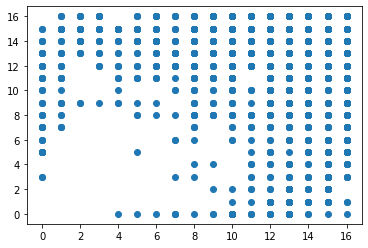

In [6]:
from matplotlib import pyplot as plt
plt.scatter(inp.iloc[:,0],inp.iloc[:,1])

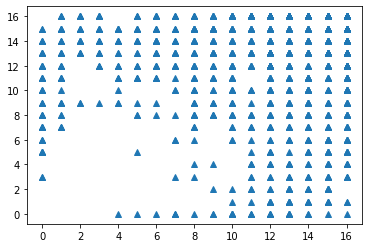

In [7]:
plt.plot(inp.iloc[:,0],inp.iloc[:,1],"^")

In [8]:
#Kmeans Algorithm
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

In [9]:
model.fit(inp)

KMeans(n_clusters=3)

In [10]:
model.cluster_centers_

array([[13.22631579,  5.06052632],
       [13.65395349, 14.06790698],
       [ 4.57602339, 12.4122807 ]])

In [11]:
model.labels_           #cluster membership

array([0, 1, 2, ..., 1, 0, 0], dtype=int32)

In [12]:
pd.DataFrame(model.labels_).value_counts()

1    1075
0     380
2     342
dtype: int64

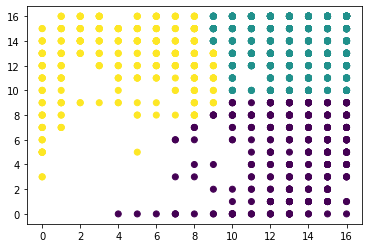

In [13]:
plt.scatter(inp.iloc[:,0],inp.iloc[:,1],c= model.labels_)

In [14]:
from sklearn.metrics import silhouette_score,silhouette_samples   #silhouette_sample
silhouette_score (inp,model.labels_)

0.505024105570525

In [15]:
silhouette_samples(inp,model.labels_)

array([0.14982135, 0.59054555, 0.5629452 , ..., 0.50184556, 0.39405296,
       0.363741  ])

In [16]:
ss = []
for num_clusters in range(2,50):
  model = KMeans(n_clusters = num_clusters)
  model.fit(inp)
  ss.append(silhouette_score(inp,model.labels_))

In [17]:
import numpy as np
best_num = np.array(ss).argmax()+2
best_num

46

In [18]:
model = KMeans(n_clusters = best_num)
model.fit(inp)

KMeans(n_clusters=46)

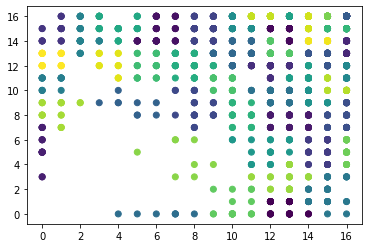

In [19]:
plt.scatter(inp.iloc[:,0],inp.iloc[:,1],c= model.labels_)

In [20]:
pd.DataFrame(model.labels_).value_counts()

13    149
30     77
41     70
15     69
9      65
6      64
33     62
42     59
12     59
5      52
1      51
36     50
21     48
22     44
26     44
8      44
3      44
17     43
11     42
18     40
28     40
2      38
44     36
25     35
0      34
27     33
23     33
40     29
38     29
10     28
20     27
35     25
24     23
29     23
45     21
32     21
31     21
34     19
7      19
39     18
4      17
19     14
43     14
14      9
37      8
16      7
dtype: int64

In [21]:
np.unique(np.array(model.labels_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int32)

In [22]:
from sklearn.cluster import DBSCAN
model = DBSCAN()
model.fit(inp)

DBSCAN()

In [23]:
pd.DataFrame(model.labels_).value_counts()

-1      218
 26     149
 50      52
 75      50
 13      44
       ... 
 103      5
 87       5
 44       5
 8        5
 118      5
Length: 120, dtype: int64

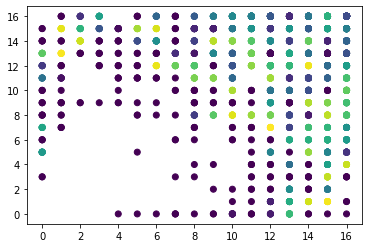

In [24]:
plt.scatter(inp.iloc[:,0],inp.iloc[:,1],c= model.labels_)

In [25]:
model = DBSCAN(eps=1)
model.fit(inp)

DBSCAN(eps=1)

In [26]:
pd.DataFrame(model.labels_).value_counts()

 0    1789
-1       8
dtype: int64

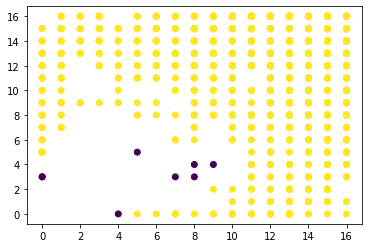

In [27]:
plt.scatter(inp.iloc[:,0],inp.iloc[:,1],c= model.labels_)

In [28]:
cc=[]
for k in range(0,len(np.unique(model.labels_))):
  clc=[]
  for i in range(0,inp.shape[0]):
      if(model.labels_[i]==k):
             clc.append(inp.iloc[i,:])
  cc.append(pd.DataFrame(clc).mean())

In [29]:
cc

[pixel_0_3    11.865847
 pixel_0_4    11.887088
 dtype: float64, Series([], dtype: float64)]

In [30]:
np.unique(model.labels_)

array([-1,  0])

In [36]:
#AgglomerativeClustering,
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3)


In [37]:
model.fit(inp)

AgglomerativeClustering(n_clusters=3)

In [38]:
model.labels_

array([1, 2, 0, ..., 2, 0, 1])

In [39]:
silhouette_samples(inp,model.labels_)

array([ 0.28415667,  0.50883697,  0.51152195, ...,  0.4030555 ,
       -0.3232271 ,  0.43425415])

In [41]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [42]:
link = linkage(inp, method = 'average')

{'icoord': [[5.0, 5.0, 15.0, 15.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [35.0, 35.0, 52.5, 52.5], [25.0, 25.0, 43.75, 43.75], [10.0, 10.0, 34.375, 34.375], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [85.0, 85.0, 102.5, 102.5], [75.0, 75.0, 93.75, 93.75], [22.1875, 22.1875, 84.375, 84.375], [125.0, 125.0, 135.0, 135.0], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [155.0, 155.0, 172.5, 172.5], [145.0, 145.0, 163.75, 163.75], [130.0, 130.0, 154.375, 154.375], [225.0, 225.0, 235.0, 235.0], [215.0, 215.0, 230.0, 230.0], [205.0, 205.0, 222.5, 222.5], [195.0, 195.0, 213.75, 213.75], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [265.0, 265.0, 282.5, 282.5], [255.0, 255.0, 273.75, 273.75], [245.0, 245.0, 264.375, 264.375], [204.375, 204.375, 254.6875, 254.6875], [142.1875, 142.1875, 229.53125, 229.53125], [415.0, 415.0, 425.0, 425.0], [405.0, 405.0, 420.0, 420.0], [395.0, 395.0, 412.5, 412.5], [385.0, 385.0, 403.75, 403.75], [375.0, 

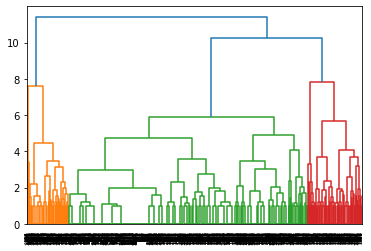

In [44]:
print(dendrogram(link))